In [29]:
import pandas as pd
import numpy as np

In [30]:
filename = "..\\data\\COGEDNFCPANASCONDITIONT2T3.csv"

In [31]:
KEYFILE = "key.csv"
df_key = pd.read_csv("..\data\{}".format(KEYFILE))

def tweak_key(df):
    return(df
           .drop(df.index[df.ID == 2018])
           .assign(ID=lambda df_: df_.ID.astype(str))
           .melt(id_vars="ID")
           .rename(columns={"variable": "session",
                            "value": "condition"})
           .assign(session=lambda df_: df_.session.astype("category"),
                   condition=lambda df_: df_.condition.astype("category"))
          )

KEYFILE = "key.csv"
df_key = pd.read_csv("..\data\{}".format(KEYFILE))
key = tweak_key(df_key)

In [32]:
def get_dprime(df):
    
    return(df
           .rename(columns={"d'": "dprime", "Condition": "condition"})
           .replace({"2nd test": "T2", "3rd test": "T3"})
           .astype({})
          )

df = pd.read_csv(filename, sep=";", decimal=",")
        
fiveback = get_dprime(df)

In [61]:
cols = ["ID", "session", "condition", "dprime"]

df_fiveback = fiveback[cols]

sessions = ["T2", "T3"]
conds_to_drop = ["CXS", "DCS"]

(fiveback
 .query("session in @sessions")
 .query("condition not in @conds_to_drop")
 .assign(order=lambda df_: np.where((df_.condition == "CS") & (df_.session == "T2"), 0,1))
 .pivot_table(values=["dprime", "order"],
              index="ID",
              columns="condition")
 .dropna(axis=0, how="any")
 .reset_index()
 .set_axis(["ID", "cond1", "cond2", "order", "null"], axis=1)
 .astype({"order": "uint8"})
 .drop("null", axis=1)

#  .to_csv("..//results//dprime_cs_dcxs.csv")
)

,ID,cond1,cond2,order
0,2063,1.041999,1.503474,0
1,2090,2.037272,8.823503,0
2,3006,10.577221,4.323768,1
3,3018,6.048163,7.800601,1
4,3060,1.403297,1.395718,1
5,4015,6.346146,4.923098,0
6,4020,1.073206,1.463097,1
7,5026,7.642330,6.042563,1
8,5039,4.109155,4.431203,1
9,5091,1.332175,0.583593,0


In [6]:
conds_to_drop = ["DCS", "DCXS"]
fiveback = (fiveback
 .query("Condition not in @conds_to_drop")
 .pivot_table(values=["dprime"],
              index="ID",
              columns="Condition")
 .dropna(axis=0, how="any")
 .reset_index()
 .droplevel(level=0, axis=1)
)

In [95]:
fiveback.to_csv("..\\results\\fiveback.csv")

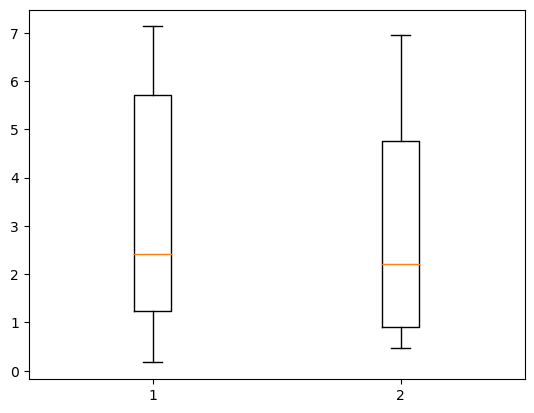

In [94]:
import matplotlib.pyplot as plt
f, ax = plt.subplots()

ax.boxplot([fiveback.CS, fiveback.CXS]);

In [75]:
fiveback.session

0      T2
1      T3
2      T2
3      T3
4      T2
       ..
117    T3
118    T2
119    T3
120    T2
121    T3
Name: session, Length: 122, dtype: object